In [1]:
import pymaid
import matplotlib.pyplot as plt

# Connect to CATMAID
rm = pymaid.CatmaidInstance('www.your.catmaid-server.org',
                            'HTTP_USER' ,
                            'HTTP_PASSWORD',
                            'TOKEN')

# Get a neuron
n = pymaid.get_neurons(16)

In [2]:
lh = pymaid.get_volume('LH_R')

in_lh = n.connectors[pymaid.in_volume(n.connectors, lh)]
in_lh.head()

,treenode_id,connector_id,relation,x,y,z
340,5464238,5464237,0,343524,160024,188200
341,10369976,10370122,1,383883,147184,177600
368,20452694,11296577,1,335499,154147,188280
369,20452694,20452710,1,336487,153234,188280
390,10736254,10736250,0,385618,136047,172120


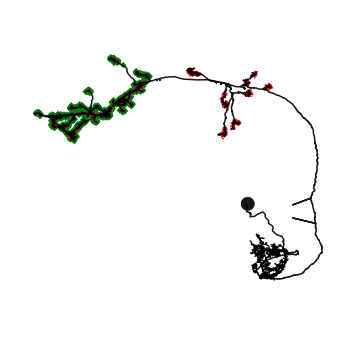

In [3]:
fig, ax = pymaid.plot2d(n, connectors=True,
                        linewidth=1.5, method='3d',
                        cn_size=2)

cn_coords = in_lh[['x','y','z']].values

fig,ax = pymaid.plot2d(cn_coords, method='3d', ax=ax,
                       scatter_kws={'s': 20,
                                    'color': 'g',
                                    'marker': 'D'
                                   })

ax.dist = 5

plt.show()

In [4]:
# Import plotly bindings
import plotly.offline

# Initialize notebook mode
plotly.offline.init_notebook_mode(connected=True)

In [5]:
# Generate a plotly figure
fig = pymaid.plot3d([cn_coords, n] ,backend='plotly',
                    connectors=True, width=800,
                    scatter_kws={'color': (0,255,0), 'opacity': .5})

plotly.offline.iplot(fig)

INFO  : Use plotly.offline.plot(fig, filename="3d_plot.html") to plot. Optimised for Google Chrome. (pymaid)
